# __Тестовое задание.__
### Выполните эти тестовые задания. Решите по мере своего понимания задания, если есть сомнения - предоставьте несколько вариантов решений.

___

### __Задание 1__. Опираясь на данные по использованию интернета, за определенный промежуток в разных регионах, хранящихся в файле data_traffic.csv. Необходимо:

1. Произвести очистку данных.
2. Вычислить статистику использования интернета в регионах по месяцам (визуализировать)

In [1]:
import pandas as pd
import numpy as np

# Загрузим данные
data = pd.read_csv('data_traffic.csv')

# <YOUR_CODE_HERE>
df = data.copy()
df



,customer_id,date_time,region,internet_used_gb
0,NaN,2022-11-16,NaN,43.0
1,63866.0,2022-09-13,NaN,17.0
2,17555.0,2022-11-30,Batken,32.0
3,20260.0,2022-08-14,NaN,6.0
4,53675.0,NaN,Talas,44.0
...,...,...,...,...
2995,32725.0,2022-03-01,IK,45.0
2996,25918.0,2022-07-19,Batken,32.0
2997,NaN,2022-06-09,Talas,3.0
2998,7875.0,2022-10-10,Naryn,NaN


# Data prep

In [2]:
df.info()
##check the NaN values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2390 non-null   float64
 1   date_time         2387 non-null   object 
 2   region            2432 non-null   object 
 3   internet_used_gb  2392 non-null   float64
dtypes: float64(2), object(2)
memory usage: 93.9+ KB
customer_id         610
date_time           613
region              568
internet_used_gb    608
dtype: int64


# Fillin with mean and most frequent values

In [3]:
#fill the Na regions with mode, Which is JA
df['region'].mode()
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [4]:
#fill the Na values in internet_used_gb with mean usage of internet in corresponding region
df['internet_used_gb']=df.groupby('region')['internet_used_gb'].transform(lambda x: x.fillna(x.mean()))

In [5]:
df

,customer_id,date_time,region,internet_used_gb
0,NaN,2022-11-16,JA,43.000000
1,63866.0,2022-09-13,JA,17.000000
2,17555.0,2022-11-30,Batken,32.000000
3,20260.0,2022-08-14,JA,6.000000
4,53675.0,NaN,Talas,44.000000
...,...,...,...,...
2995,32725.0,2022-03-01,IK,45.000000
2996,25918.0,2022-07-19,Batken,32.000000
2997,NaN,2022-06-09,Talas,3.000000
2998,7875.0,2022-10-10,Naryn,25.267148


# Keep the month only value

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
df['month'] = df['date_time'].dt.to_period('M')

# Group by the usage of internet in regions by month

In [7]:
monthly_region_usage = df.groupby(['region', 'month'])['internet_used_gb'].sum().reset_index()

In [8]:
monthly_region_usage

,region,month,internet_used_gb
0,Batken,2022-01,587.863309
1,Batken,2022-02,380.266187
2,Batken,2022-03,539.064748
3,Batken,2022-04,639.064748
4,Batken,2022-05,344.000000
...,...,...,...
79,Talas,2022-08,753.885714
80,Talas,2022-09,530.207143
81,Talas,2022-10,502.207143
82,Talas,2022-11,642.942857


# Vizualization

<Figure size 1000x600 with 0 Axes>

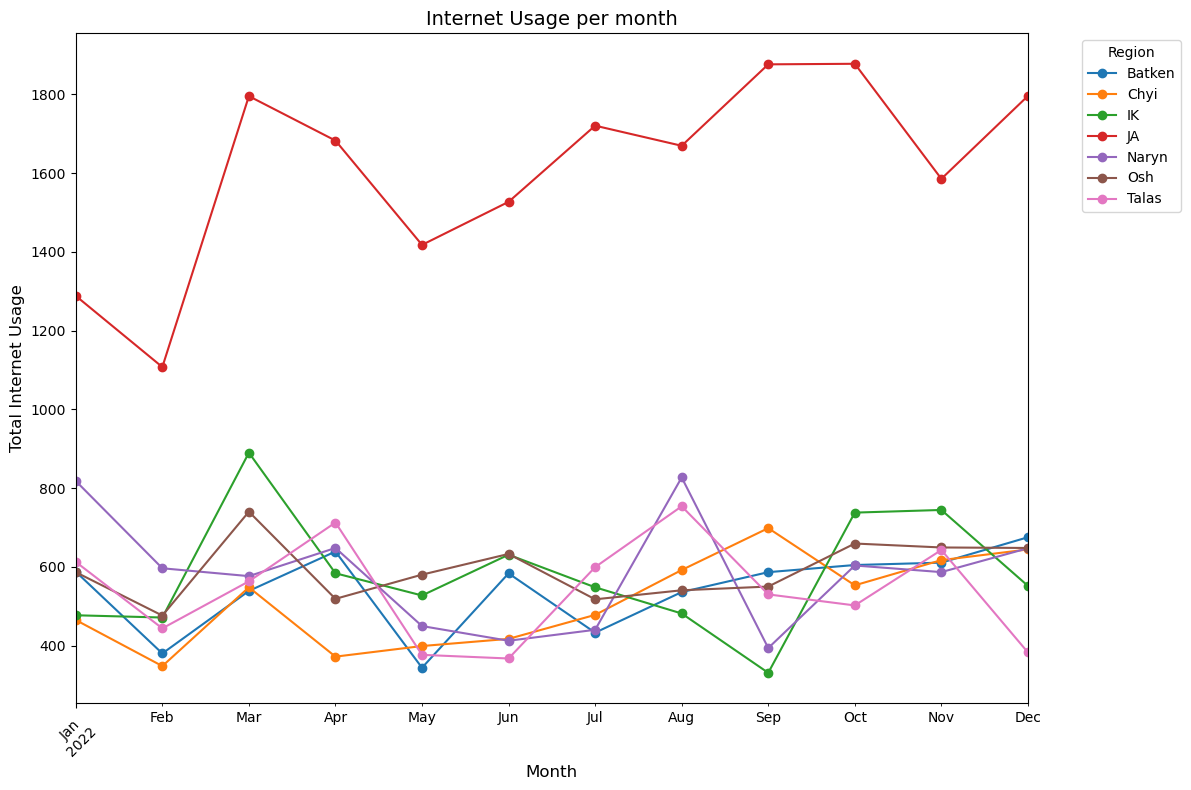

In [9]:
import matplotlib.pyplot as plt

pivot_table = monthly_region_usage.pivot(index='month', columns='region', values='internet_used_gb')

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='line', marker='o', figsize=(12, 8))

plt.title('Internet Usage per month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Internet Usage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Internet usage per single region

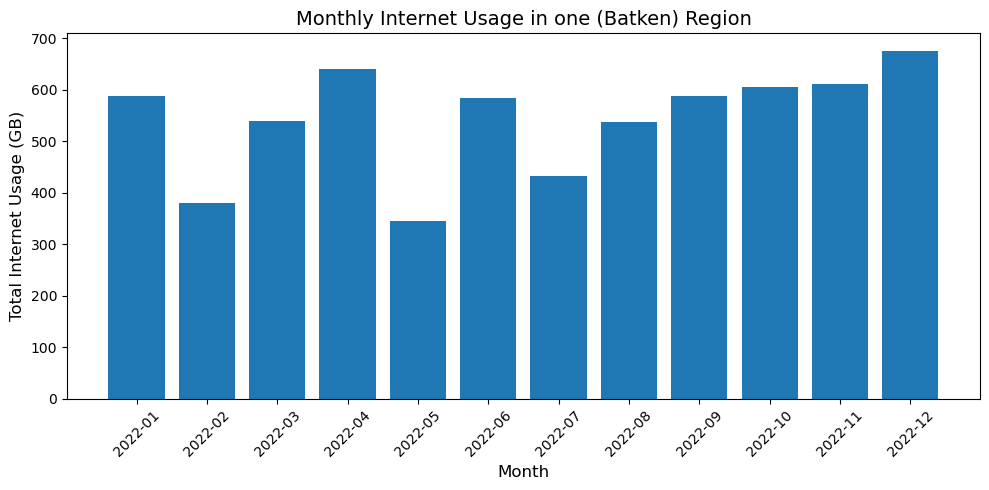

In [10]:
single_region_data = monthly_region_usage[monthly_region_usage['region'] == 'Batken']##Replace the "Batken" with any region you need to see

# Plotting Batken's data
plt.figure(figsize=(10, 5))
plt.bar(single_region_data['month'].astype(str), single_region_data['internet_used_gb'])

# Adding titles and labels
plt.title('Monthly Internet Usage in one (Batken) Region', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Internet Usage (GB)', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### __Задание 2__. Вам даны 3 csv файла:  
В файле "churn_info.csv" лежит информация об оттоке клиентов (0 - ушел, 1 - не ушел)  
В файле "customer_info.csv" лежит информация о клиентах.  
В файле "history_info.csv" лежит информация об истории каждого клиента в определенный промежуток времени, включая трафик использования интернета, входящие и исходящие звонки

Задание :  

Вам нужно построить модель оттока, для того, чтобы предсказывать, уйдет ли клиент при помощи информации о самом клиенте и его исторических данных.

Модель может быть составлена в любом виде. Оцените качество работы модели с помощью метрик качества.  

Результат :  
1. Код создания модели (.ipynb)  
2. Результат тестирования в любом формате.

In [11]:
import pandas as pd

# Загрузка данных
churn = pd.read_csv('churn_info.csv')
cs_info = pd.read_csv('customer_info.csv')
cs_history = pd.read_csv('history_info.csv')
# <YOUR_CODE_HERE>




In [12]:
churn[churn['customer_id']==9245]
cs_info[cs_info['customer_id']==9245]
cs_history[cs_history['customer_id']==9245]

,customer_id,call_in,call_out,internet_usage,date_time
1142,9245,35,67,18,2022-06-24
1215,9245,90,7,24,2022-08-23
1630,9245,85,31,63,2022-06-02
3887,9245,98,75,41,2022-08-24
4028,9245,23,81,59,2022-06-23


# Changing date of birth to age for comfort

In [13]:
from datetime import datetime
cs_info
def calculate_age(birthday):
    birth_date = datetime.strptime(birthday, '%Y-%m-%d')
    today = datetime.today()
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
cs_info['age'] = cs_info['birthday'].apply(calculate_age)
cs_info.pop('birthday')

0      1973-11-21
1      1992-01-08
2      1988-02-18
3      1975-05-05
4      1976-01-06
          ...    
995    1976-04-20
996    1992-08-04
997    2005-09-15
998    1994-05-28
999    1976-11-22
Name: birthday, Length: 1000, dtype: object

In [14]:
cs_history.isnull().sum()

customer_id       0
call_in           0
call_out          0
internet_usage    0
date_time         0
dtype: int64

In [15]:
cs_history[cs_history['customer_id']==9245]


,customer_id,call_in,call_out,internet_usage,date_time
1142,9245,35,67,18,2022-06-24
1215,9245,90,7,24,2022-08-23
1630,9245,85,31,63,2022-06-02
3887,9245,98,75,41,2022-08-24
4028,9245,23,81,59,2022-06-23


# Group by customer and calculate the mean for each customer's history

In [16]:
customer_mean_data = cs_history.groupby('customer_id')[['call_in', 'call_out', 'internet_usage']].mean()
customer_mean_data


,call_in,call_out,internet_usage
customer_id,,,
9000,66.666667,55.000000,30.666667
9001,25.666667,67.666667,52.000000
9002,78.000000,56.666667,40.333333
9003,44.000000,69.000000,29.000000
9004,59.000000,7.250000,41.750000
...,...,...,...
9997,52.000000,52.800000,45.400000
9998,41.833333,51.333333,43.833333
9999,47.285714,43.714286,34.000000


In [17]:
len(churn['customer_id'])

1000

In [18]:
len(customer_mean_data)

997

In [19]:
#the difference in lenth of the datasets, may be the reasoned by the lack of history data for some customer ids

# Merge all the datasets in one

In [20]:
merged_data = pd.merge(churn, customer_mean_data, on='customer_id', how='left')
merged_data

,customer_id,churn,call_in,call_out,internet_usage
0,9245,0,66.200000,52.200000,41.000000
1,9602,1,52.428571,51.857143,47.142857
2,9939,1,54.250000,77.000000,48.000000
3,9600,1,37.400000,56.000000,34.000000
4,9796,1,34.750000,34.500000,49.000000
...,...,...,...,...,...
995,9088,1,38.333333,40.666667,45.000000
996,9502,0,38.000000,79.000000,46.000000
997,9272,1,35.857143,65.285714,42.857143
998,9025,0,33.888889,70.666667,37.222222


In [21]:
merged_data_1 = pd.merge(merged_data, cs_info, on='customer_id', how='left')
merged_data_1

,customer_id,churn,call_in,call_out,internet_usage,gender,interest,age
0,9245,0,66.200000,52.200000,41.000000,0.0,Cars,34.0
1,9602,1,52.428571,51.857143,47.142857,0.0,Taxi,28.0
2,9939,1,54.250000,77.000000,48.000000,1.0,Medicine,46.0
3,9600,1,37.400000,56.000000,34.000000,0.0,Kids,26.0
4,9796,1,34.750000,34.500000,49.000000,0.0,Medicine,43.0
...,...,...,...,...,...,...,...,...
995,9088,1,38.333333,40.666667,45.000000,1.0,Beauty,39.0
996,9502,0,38.000000,79.000000,46.000000,0.0,Cars,23.0
997,9272,1,35.857143,65.285714,42.857143,1.0,IT,35.0
998,9025,0,33.888889,70.666667,37.222222,0.0,Taxi,53.0


# Check the null values

In [22]:
merged_data_1.isnull().sum()

customer_id       0
churn             0
call_in           5
call_out          5
internet_usage    5
gender            2
interest          2
age               2
dtype: int64

In [23]:
merged_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   churn           1000 non-null   int64  
 2   call_in         995 non-null    float64
 3   call_out        995 non-null    float64
 4   internet_usage  995 non-null    float64
 5   gender          998 non-null    float64
 6   interest        998 non-null    object 
 7   age             998 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


# Mapping the interest values

In [24]:
merged_data_1['interest'].unique()

array(['Cars', 'Taxi', 'Medicine', 'Kids', 'Beauty', nan, 'IT'],
      dtype=object)

In [25]:
merged_data_1['interest'] = merged_data_1['interest'].fillna(merged_data_1['interest'].mode()[0])

In [26]:
merged_data_1['interest'] = merged_data_1['interest'].map( { 'Cars': 0, 'Taxi': 1, 'Medicine': 2, 'Kids': 3, 'Beauty': 4, 'IT': 5} ).astype(int)

# Fill missing values with mean values 

In [27]:
merged_data_1['call_in']= merged_data_1['call_in'].fillna(merged_data_1['call_in'].mean()).astype(int)
merged_data_1['call_out']= merged_data_1['call_out'].fillna(merged_data_1['call_out'].mean()).astype(int)
merged_data_1['internet_usage']= merged_data_1['internet_usage'].fillna(merged_data_1['internet_usage'].mean())
merged_data_1['age']= merged_data_1['age'].fillna(merged_data_1['age'].mean()).astype(int)
merged_data_1['gender']= merged_data_1['gender'].fillna(merged_data_1['gender'].mode()[0]).astype(int)


In [28]:
merged_data_1

,customer_id,churn,call_in,call_out,internet_usage,gender,interest,age
0,9245,0,66,52,41.000000,0,0,34
1,9602,1,52,51,47.142857,0,1,28
2,9939,1,54,77,48.000000,1,2,46
3,9600,1,37,56,34.000000,0,3,26
4,9796,1,34,34,49.000000,0,2,43
...,...,...,...,...,...,...,...,...
995,9088,1,38,40,45.000000,1,4,39
996,9502,0,38,79,46.000000,0,0,23
997,9272,1,35,65,42.857143,1,5,35
998,9025,0,33,70,37.222222,0,1,53


# Model 1- Logistic regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train/test split

In [30]:
X = merged_data_1.drop(['churn', 'customer_id'], axis=1)  # Exclude target and identifier columns
y = merged_data_1['churn']  # Target variable

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model=LogisticRegression()

In [33]:
##fit the data in the model
model.fit(X_train, y_train)

LogisticRegression()

# Check the scores

In [34]:
model.score(X_train, y_train)

0.54375

In [35]:
model.score(X_test, y_test)

0.49

# F1 score

In [36]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f1

0.5363636363636365

# Using Cross Validation

In [37]:
from sklearn.model_selection import KFold

In [38]:
kf = KFold(n_splits=5, shuffle=True)### dividing data in splits 
splits = list(kf.split(X))

# Getting the scores and calc mean


In [39]:
scores = []
n = 1
for train_indices, test_indices in splits:
    X_train = X.values[train_indices]
    X_test = X.values[test_indices]
    y_train = y.values[train_indices]
    y_test = y.values[test_indices]
    
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print(f"{n} models Score on test data: {model.score(X_test, y_test)}")
    n += 1

1 models Score on test data: 0.565
2 models Score on test data: 0.55
3 models Score on test data: 0.48
4 models Score on test data: 0.51
5 models Score on test data: 0.545


In [40]:
sum=0
for i in scores:
    sum=sum+i
sum/5

0.53

# Model 2- RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RandomForest = RandomForestClassifier(n_estimators = 400, max_depth=10, random_state=0)

In [43]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=400, random_state=0)

# Scores

In [44]:
RandomForest.score(X_train, y_train)

0.99375

In [45]:
RandomForest.score(X_test, y_test)

0.49

# Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score(RandomForest, X, y, cv=5)

In [48]:
scores.mean()

0.48600000000000004

In [49]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f1

0.5687203791469194

# Gradient Boosting

In [50]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [51]:
from xgboost import XGBClassifier

In [52]:
model = XGBClassifier(n_estimators=400, max_depth=10, learning_rate=0.1, random_state=42)

In [53]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
model.score(X_train, y_train)

1.0

In [55]:
model.score(X_test, y_test)

0.44

# Feature Importances

In [56]:
import matplotlib.pyplot as plt

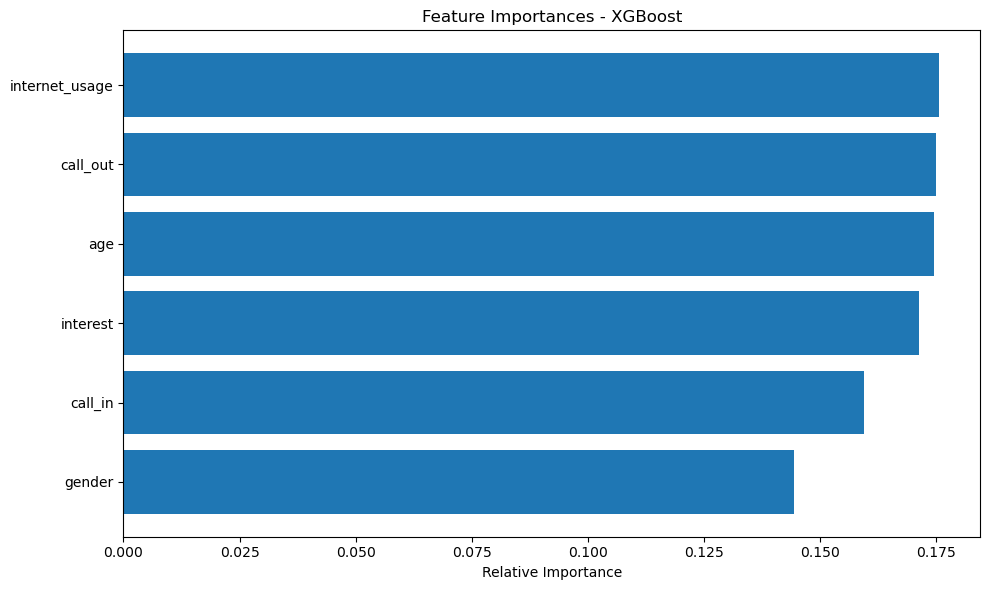

In [57]:
feature_importances = model.feature_importances_

# Create a bar plot for feature importances
features = X.columns  # Get feature names
indices = np.argsort(feature_importances)  # Sort by importance

# Plot
plt.figure(figsize=(10, 6))
plt.title('Feature Importances - XGBoost')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()

# Display the plot
plt.show()

### __Задание 3__. Напишите запрос.
Есть таблица выдачи сим-карт, с полями:  
id - id записи  
date - дата выдачи сим-карты  
customer_id - id клиента  
balance - первоначальный баланс  
tariff_id - id тарифа  

id | date | customer_id | balance | tariff_id |
--- | --- | --- | --- | ---
1023 | 2021-04-12 | 234812 | 100 | 12 |
1024 | 2021-02-02 | 234198 | 150 | 7 |
1025 | 2021-03-23 | 224519 | 110 | 12 |
1026 | 2021-04-18 | 282943 | 120 | 12 |
... | ... | ... | ... | ... |
37817 | 2022-11-13 | 192522 | 700 | 3 |
37819 | 2022-11-19 | 234812 | 40 | 5 |

Напишите SQL запрос, на любом известном вам диалекте, которой вернет id, балансы и тарифы ПРЕДпоследних сим-карт по всем повторным клиентам (те, кто имел 2 и более сим-карт). 



####Assumint that the table name is "SimCards"
WITH NumSimCards as (
    SELECT 
        id, customer_id, balance, tariff_id, date,
        ROW_NUMBER() OVER (PARTITION BY customer_id ORDER BY date DESC) AS rank
    FROM SimCards
)
SELECT 
    id, customer_id,balance, tariff_id,
FROM NumSimCards
WHERE rank = 2  -- selecting the second latest SIM card
AND customer_id IN (
    SELECT customer_id 
    FROM sim_cards
    GROUP BY customer_id
    HAVING COUNT(*) > 1
)


In [1]:
!git init

Initialized empty Git repository in C:/Users/nurbe/Downloads/Ð¢ÐµÑ…Ð—Ð°Ð´Ð°Ð½Ð¸Ðµ/.git/


In [4]:
!git add test_tasks_Nurberdi.ipynb

In [5]:
!git commit -m "chn"

[master (root-commit) ba7166d] chn
 1 file changed, 2583 insertions(+)
 create mode 100644 test_tasks_Nurberdi.ipynb


In [11]:
!git remote add origin https://github.com/NurberdiNazaraliev/Data_Processing-/tree/main/data_proc

error: remote origin already exists.


In [18]:
!git remote set-url origin https://github.com/NurberdiNazaraliev/Data_Processing

In [19]:
!git push origin master

remote: Repository not found.
fatal: repository 'https://github.com/NurberdiNazaraliev/Data_Processing/' not found


In [14]:
!git branch

* master


In [15]:
git push -u origin master

SyntaxError: invalid syntax (4181408665.py, line 1)